In [1]:
from vpython import*
import math
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

**Comments**

Choices for k, m, and dt were chosen similarly to the reference program.  Other these were the values that seemed to produce the best result in terms of visualization and data output.

# Forward Euler

In [2]:
scene1=canvas()

<IPython.core.display.Javascript object>

In [3]:
N = 3
k = 1
m = 1
t = 0


spacing = 1
atom_radius = 0.4*spacing
scene1.center = 0.5*(N-1)*vector(1,1,1)
dt = 0.02*(2*pi*sqrt(m/k))

time = []
totalE = []
kineticEnergy = []
potentialEnergy = []

In [4]:
# function to calculate the potential energy in each spring and update each atom's momentum
def springForce(spring):
    PE = 0
    spring.axis = spring.end.pos - spring.start.pos
    L = mag(spring.axis)
    Fdt = spring.axis.norm() * (k*dt * (1-spacing/L))
    
    # if atom at start of spring is visible
    if spring.start.visible:
        spring.start.momentum = spring.start.momentum + Fdt
    # if atom at end of spring is visible
    if spring.end.visible:
        spring.end.momentum = spring.end.momentum - Fdt
    
    # if spring exists and relevant to calculation
    if spring.update:
        PE = .5*k*mag2(spring.axis)
    # return potential energy of spring    
    return PE

# function to update position of each atom and calculate kinetic energy
def atomPos(atom):
    KE = 0
    if atom.visible:
        atom.velocity = atom.momentum/m
        KE = .5*m*mag2(atom.velocity)
        atom.pos += atom.velocity*dt
    # return kinetic energy of atom    
    return KE

In [5]:
class Lattice:
    
    # constructor initializes a matrix of atoms based on value of N and creates springs between all adjacent atoms
    def __init__(self, momentumRange ):
        self.atoms = []
        self.springs = []
        
        for z in range(-1,N+1,1):
            for y in range(-1,N+1,1):
                for x in range(-1,N+1,1):
                    atom = sphere()
                    atom.pos = vector(x,y,z)*spacing
                    atom.radius = atom_radius
                    
                    # give atom random velocity if within matrix size
                    if (0 <= x < N and 0 <= y < N and 0 <= z < N):
                        atom.momentum = momentumRange*vec.random() 
                        
                    else:
                        atom.visible = False
                        atom.momentum = vector(0,0,0)
                        
                    atom.index = len(self.atoms)
                    self.atoms.append(atom)
        
        # iterate through matrix to find each atom's neighbor and create a spring
        # additional atoms that are not visible are added for ease of finding neighbors and placing springs
        for atom in self.atoms:
            if atom.visible:
                if atom.pos.x == 0:
                    self.make_spring(self.atoms[atom.index-1], atom, False)
                    self.make_spring(atom, self.atoms[atom.index+1], True)
                elif atom.pos.x == N-1:
                    self.make_spring(atom, self.atoms[atom.index+1], False)
                else:
                    self.make_spring(atom, self.atoms[atom.index+1], True)

                if atom.pos.y == 0:
                    self.make_spring(self.atoms[atom.index-(N+2)], atom, False)
                    self.make_spring(atom, self.atoms[atom.index+(N+2)], True)
                elif atom.pos.y == N-1:
                    self.make_spring(atom, self.atoms[atom.index+(N+2)], False)
                else:
                    self.make_spring(atom, self.atoms[atom.index+(N+2)], True)
                    
                if atom.pos.z == 0:
                    self.make_spring(self.atoms[atom.index-(N+2)**2], atom, False)
                    self.make_spring(atom, self.atoms[atom.index+(N+2)**2], True)
                elif atom.pos.z == N-1:
                    self.make_spring(atom, self.atoms[atom.index+(N+2)**2], False)
                else:
                    self.make_spring(atom, self.atoms[atom.index+(N+2)**2], True)
    
    # function to create a spring in between each adjacent atom. Parameter "update" is used in springForce() 
    # to check if the spring is relevant for calculation. 
    def make_spring(self, start, end, update):
            spring = helix()
            spring.visible = False
            spring.update = update
            spring.pos = start.pos
            spring.axis = end.pos-start.pos
            spring.start = start
            spring.end = end
            self.springs.append(spring)
                     
l = Lattice(0.1*spacing*sqrt(k/m))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# calculate sum of the potential and kinetic energy of every atom and spring each iteration and store data in list
while t < 100:
    rate(100)
    potentialE = 0
    kineticE = 0
    netEnergy = 0
    
    for atom in l.atoms:
        kineticE += atomPos(atom)
    
    for spring in l.springs:
        potentialE += springForce(spring)
    
    t += dt
    netEnergy = potentialE + kineticE
    potentialEnergy.append(potentialE)
    kineticEnergy.append(kineticE)
    totalE.append(netEnergy)
    time.append(t)
    


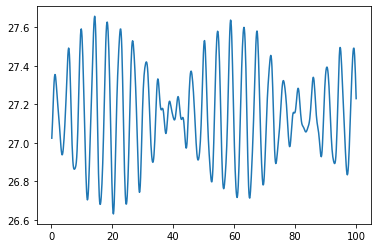

In [7]:
plt.plot(time, potentialEnergy, label="PE")

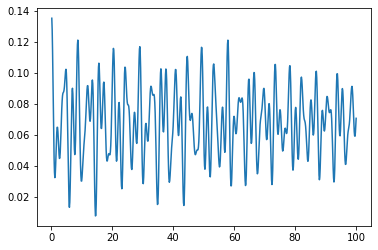

In [8]:
plt.plot(time, kineticEnergy, label="KE")

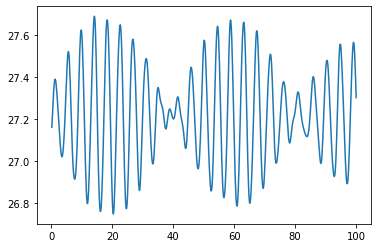

In [9]:
plt.plot(time, totalE, label="Total E")

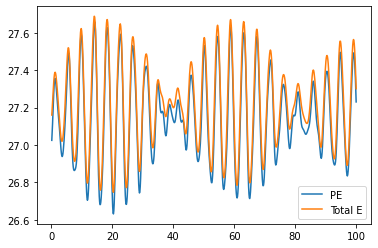

In [10]:
plt.plot(time, potentialEnergy, label="PE")
plt.plot(time, totalE, label="Total E")
plt.legend()

# Backward Euler

In [11]:
scene2=canvas()
scene2.center = 0.5*(N-1)*vector(1,1,1)

<IPython.core.display.Javascript object>

In [12]:
l2 = Lattice(0.1*spacing*sqrt(k/m))
potentialEnergy.clear()
kineticEnergy.clear()
totalE.clear()
time.clear()

In [13]:
def springForce2(spring):
    PE = 0
    spring.axis = spring.end.pos - spring.start.pos
    L = mag(spring.axis)
    Fdt = spring.axis.norm() * (k*dt * (1-spacing/L))
    spring.force = Fdt
    spring.force += Fdt
    
    if spring.start.visible:
        spring.start.momentum += spring.force
        
    if spring.end.visible:
        spring.end.momentum += - spring.force
    
    if spring.update:
        PE = .5*k*mag2(spring.axis)
        
    return PE
    
def atomPos2(atom):
    KE = 0
    if atom.visible:
        Vdt = atom.momentum/m
        KE = .5*m*mag2(Vdt)
        atom.velocity = Vdt
        atom.velocity += Vdt
        atom.pos += atom.velocity*dt
        
    return KE

In [14]:
while t < 200:
    rate(100)
    potentialE = 0
    kineticE = 0
    netEnergy = 0
    
    for atom in l2.atoms:
        kineticE += atomPos2(atom)
    
    for spring in l2.springs:
        potentialE += springForce2(spring)
    
    t += dt
    netEnergy = potentialE + kineticE
    potentialEnergy.append(potentialE)
    kineticEnergy.append(kineticE)
    totalE.append(netEnergy)
    time.append(t)

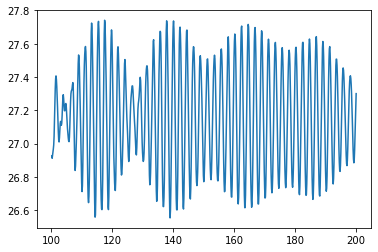

In [15]:
plt.plot(time, potentialEnergy, label="PE")

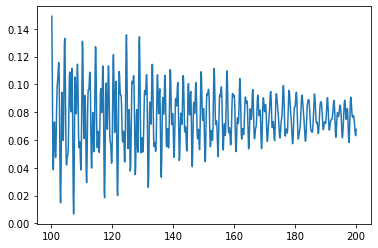

In [16]:
plt.plot(time, kineticEnergy, label="KE")

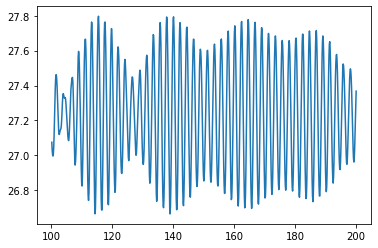

In [17]:
plt.plot(time, totalE, label="Total E")

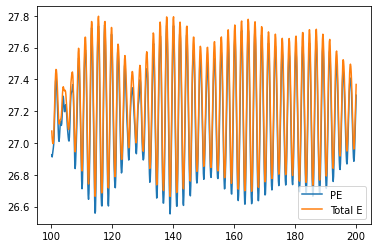

In [18]:
plt.plot(time, potentialEnergy, label="PE")
plt.plot(time, totalE, label="Total E")
plt.legend()

# Trapezoid

In [6]:
scene3=canvas()
scene3.center = 0.5*(N-1)*vector(1,1,1)

<IPython.core.display.Javascript object>

In [7]:
l3 = Lattice(0.1*spacing*sqrt(k/m))
potentialEnergy.clear()
kineticEnergy.clear()
totalE.clear()
time.clear()

In [8]:
def springForce3(spring):
    PE = 0
    spring.axis = spring.end.pos - spring.start.pos
    L = mag(spring.axis)
    Fdt = spring.axis.norm() * (k * (1-spacing/L))
    spring.force = Fdt
    spring.force = .5*(spring.force + Fdt)*dt
    
    if spring.start.visible:
        spring.start.momentum += spring.force
        
    if spring.end.visible:
        spring.end.momentum += -spring.force
    
    if spring.update:
        PE = .5*k*mag2(spring.axis)
        
    return PE
    
def atomPos3(atom):
    KE = 0
    if atom.visible:
        Vdt = atom.momentum/m
        KE = .5*m*mag2(Vdt)
        atom.velocity = Vdt
        atom.velocity += Vdt
        atom.pos += .5*(Vdt + atom.velocity)*dt
        
    return KE

In [9]:
while t < 200:
    rate(100)
    potentialE = 0
    kineticE = 0
    netEnergy = 0
    
    for atom in l3.atoms:
        kineticE += atomPos3(atom)
    
    for spring in l3.springs:
        potentialE += springForce3(spring)
    
    t += dt
    netEnergy = potentialE + kineticE
    potentialEnergy.append(potentialE)
    kineticEnergy.append(kineticE)
    totalE.append(netEnergy)
    time.append(t)

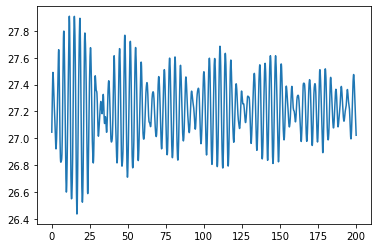

In [10]:
plt.plot(time, potentialEnergy, label="PE")

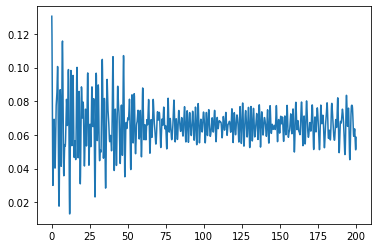

In [11]:
plt.plot(time, kineticEnergy, label="KE")

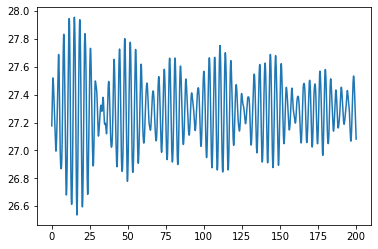

In [12]:
plt.plot(time, totalE, label="Total E")

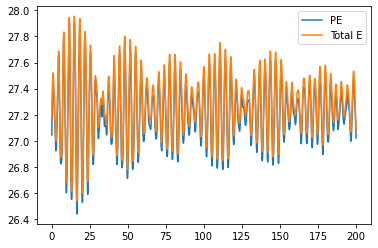

In [13]:
plt.plot(time, potentialEnergy, label="PE")
plt.plot(time, totalE, label="Total E")
plt.legend()